In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kì I 24 25/Finale Data Preparation/Data/POS_CASH_balance.csv')
df.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


- SK_ID_PREV: 1 khách hàng có thể có 0,1 hoặc nhiều hơn 1 khoản nợ
- MONTHS_BALANCE: tính bằng tháng kể từ khoản vay gần nhất trước đấy
- CNT_INSTALMENT: Thời hạn của tín dụng trước
- CNT_INSTALMENT_FUTURE: phần trả góp còn thiếu từ những khoản nợ trước
- NAME_CONTRACT_STATUS: tình trạng hợp đồng
- SK_DPD: số ngày quá hạn trong kì của khoản tín dụng trước đó
- SK_DPD_DEF: số ngày quá hạn trong kì trước của tín dụng nhưng được công ti chấp nhận


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [ ]:
df.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,8.543375e+06,8.543375e+06,8.521512e+06,8.521497e+06,8.543375e+06,8.543375e+06,8.543375e+06
mean,1.903489e+06,-3.494812e+01,1.703348e+01,1.046808e+01,1.190473e+01,5.835209e-01,1.535356e+05
std,5.359387e+05,2.605372e+01,1.200430e+01,1.114408e+01,1.340302e+02,3.042110e+01,8.871661e+04
min,1.000001e+06,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434475e+06,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,7.662200e+04
50%,1.896878e+06,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00,1.533150e+05
75%,2.369096e+06,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00,2.302930e+05
max,2.843499e+06,-1.000000e+00,8.400000e+01,8.400000e+01,4.231000e+03,3.373000e+03,3.075100e+05


### Numerical and Categorical data

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns: ", num_cols)
print("Categorical columns: ", cat_cols)

Numerical columns:  ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR']
Categorical columns:  ['NAME_CONTRACT_STATUS']


### Invalid data (illogical)

In [ ]:
# CNT_INSTALMENT_FUTURE ≤ CNT_INSTALMENT
tmp = df[df['CNT_INSTALMENT_FUTURE'] > df['CNT_INSTALMENT']]
tmp

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
241,1928179,-55,11.0,12.0,Active,0,0,109727
518,2702895,-62,20.0,23.0,Active,0,0,281161
530,2702895,-60,20.0,21.0,Active,0,0,281161
543,2702895,-61,20.0,22.0,Active,0,0,281161
3597,2824585,-38,6.0,7.0,Active,0,0,141166
...,...,...,...,...,...,...,...,...
8363816,2704473,-51,4.0,6.0,Signed,0,0,52593
8363819,2704473,-53,4.0,6.0,Signed,0,0,52593
8363822,2704473,-52,4.0,6.0,Signed,0,0,52593
8378590,1082263,-52,10.0,11.0,Active,0,0,187254


In [ ]:
tmp['SK_ID_PREV'].value_counts()

,count
SK_ID_PREV,
1770036,8
1255003,8
1760739,8
1244085,8
2214235,8
...,...
2265959,1
1238442,1
1398829,1


In [ ]:
tmp[tmp['SK_ID_PREV']==2702895].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
518,2702895,-62,20.0,23.0,Active,0,0,281161
543,2702895,-61,20.0,22.0,Active,0,0,281161
530,2702895,-60,20.0,21.0,Active,0,0,281161


In [ ]:
tmp[tmp['SK_ID_PREV']==2704473].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
8363819,2704473,-53,4.0,6.0,Signed,0,0,52593
8363822,2704473,-52,4.0,6.0,Signed,0,0,52593
8363816,2704473,-51,4.0,6.0,Signed,0,0,52593


In [ ]:
cnt_instalment_future = tmp.groupby('SK_ID_PREV')['CNT_INSTALMENT_FUTURE'].mean()
cnt_instalment_future.loc[2702895]
# month balance tinhs bang thang ke tu lan vay gan nhat
# thuw tu -62,-61,60

22.0

In [ ]:
df[df['CNT_INSTALMENT_FUTURE']==0]['NAME_CONTRACT_STATUS'].value_counts()

,count
NAME_CONTRACT_STATUS,
Completed,634869
Active,379838
Demand,6097
Signed,712
Amortized debt,365
Approved,53


khi CNT_INSTALMENT_FUTURE = 0, nghĩa là đơn vay đó đã được trả xong, tức là completed, tuy nhiên vẫn còn xuất hiện 1 số records có giá trị khác, có thể là do: chưa cập nhật,..
=> chua chac invalid

### Duplicated

In [ ]:
df.duplicated().sum()

0

### Missing value

In [ ]:
df.isnull().sum()

,0
SK_ID_PREV,0
MONTHS_BALANCE,0
CNT_INSTALMENT,21863
CNT_INSTALMENT_FUTURE,21878
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0
SK_ID_CURR,0


In [ ]:
# Hàm check missing data
# % missing data of each feature
def check_missing(df):
    total_m = df.isnull().sum().sort_values(ascending=False)
    pct_m = df.isnull().sum() *100/df.isnull().count().sort_values(ascending=False)
    df= pd.concat([total_m, pct_m], axis = 1, keys = ['Total', 'Percent'])
    df =df[df['Percent']>0]
    return df
null_values = check_missing(df)
null_values

,Total,Percent
CNT_INSTALMENT_FUTURE,21878,0.256081
CNT_INSTALMENT,21863,0.255906


% missing nhỏ, tươgn tự với invalid logic records bên trên, xem xets bỏ những record này

In [ ]:
df1 = df.copy(deep=True)
df1.drop(tmp.index, inplace=True)

In [ ]:
df1.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,8.536945e+06,8.536945e+06,8.515082e+06,8.515067e+06,8.536945e+06,8.536945e+06,8.536945e+06
mean,1.903492e+06,-3.493529e+01,1.703677e+01,1.046195e+01,1.191365e+01,5.839337e-01,1.535343e+05
std,5.359397e+05,2.605875e+01,1.200747e+01,1.114410e+01,1.340803e+02,3.043255e+01,8.871640e+04
min,1.000001e+06,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434478e+06,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,7.662200e+04
50%,1.896877e+06,-2.700000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00,1.533100e+05
75%,2.369105e+06,-1.300000e+01,2.400000e+01,1.300000e+01,0.000000e+00,0.000000e+00,2.302930e+05
max,2.843499e+06,-1.000000e+00,8.400000e+01,8.400000e+01,4.231000e+03,3.373000e+03,3.075100e+05


In [ ]:
df1['NAME_CONTRACT_STATUS'].value_counts()

,count
NAME_CONTRACT_STATUS,
Active,7812699
Completed,634872
Signed,74158
Demand,6110
Returned to the store,4534
Approved,4193
Amortized debt,365
Canceled,12
XNA,2


In [ ]:
# replace XNA with NaN
df1['NAME_CONTRACT_STATUS'].replace('XNA', np.nan, inplace=True)

<ipython-input-19-0660bbf234f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['NAME_CONTRACT_STATUS'].replace('XNA', np.nan, inplace=True)


### Distribution & Outliers


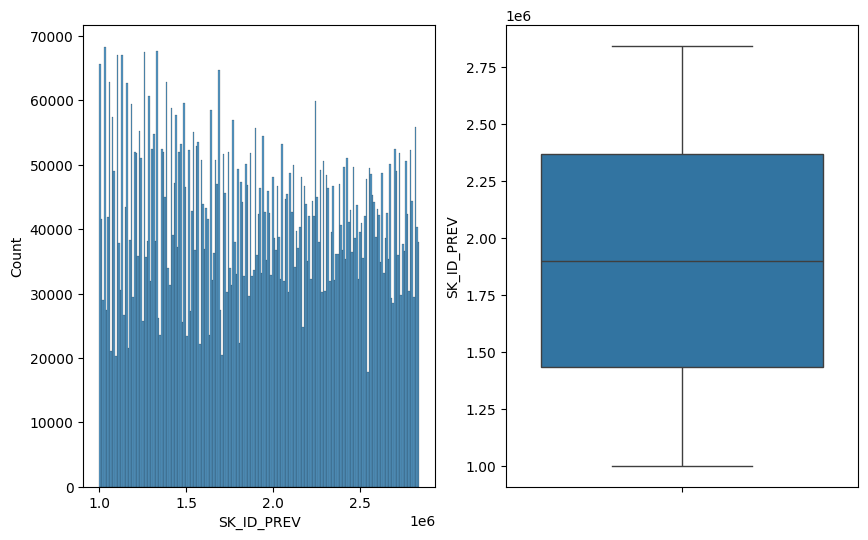

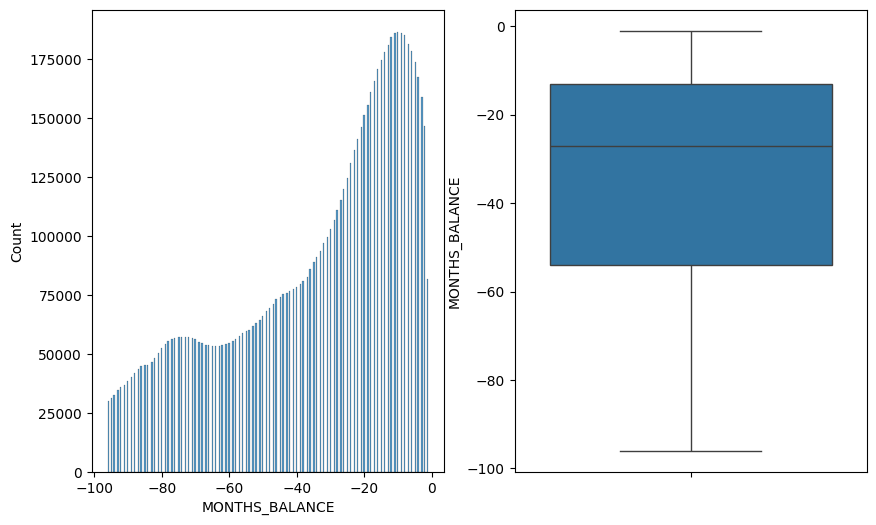

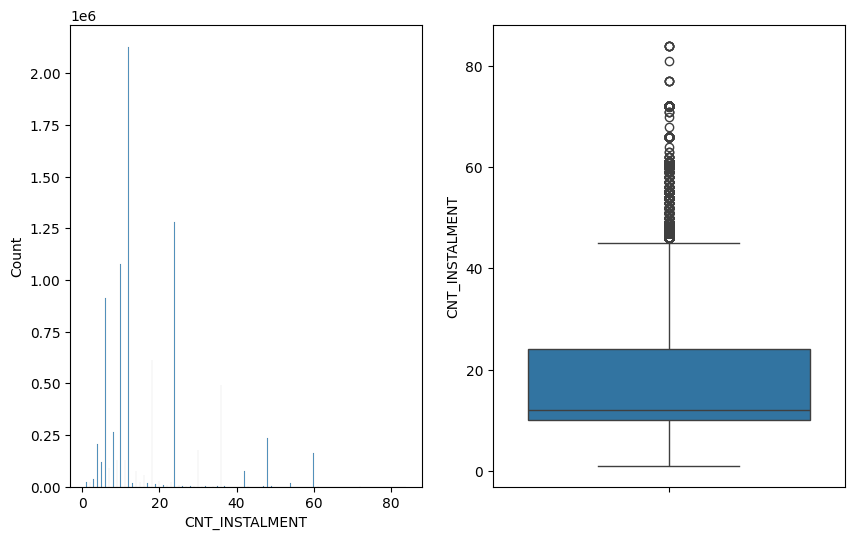

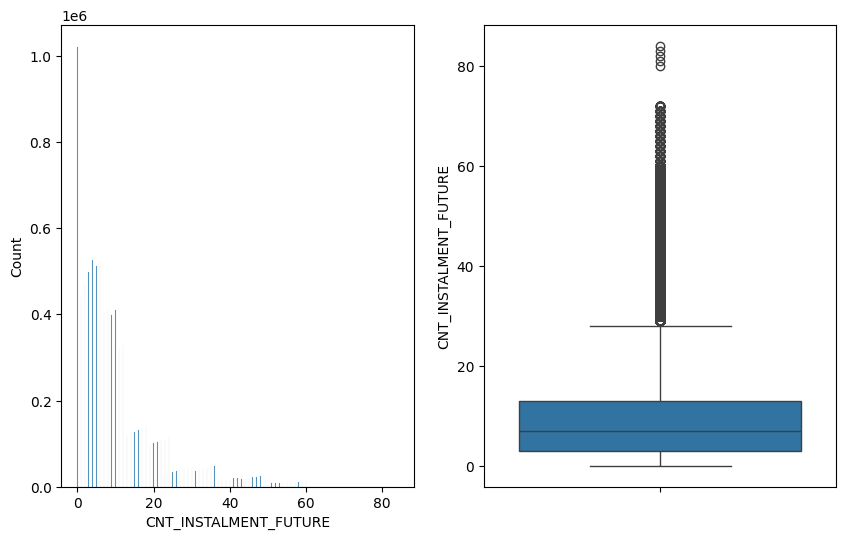

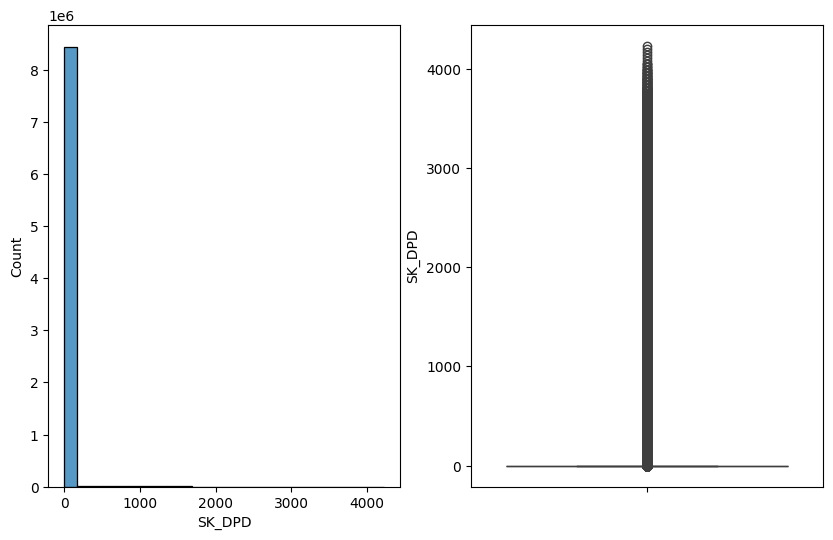

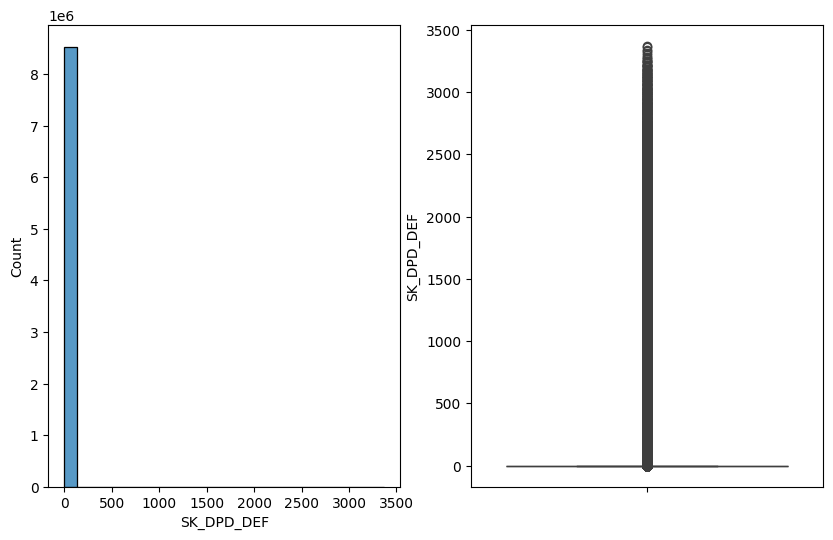

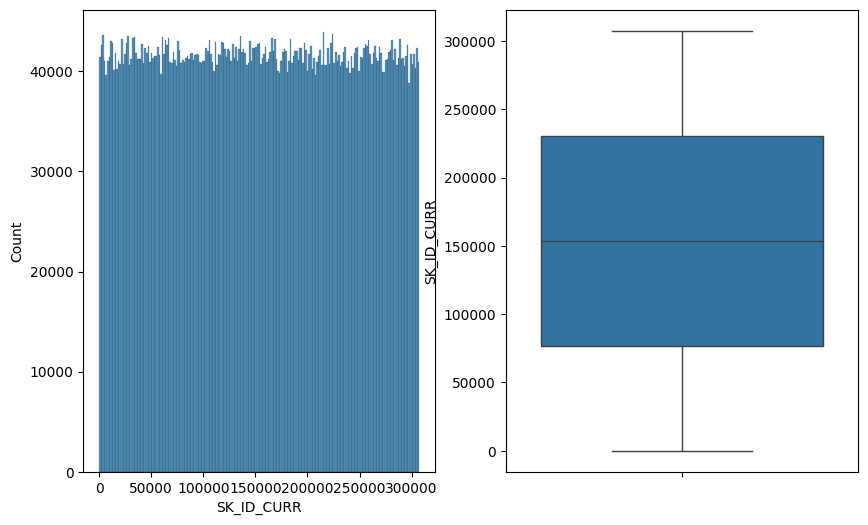

In [ ]:
def plot_distribution(df, cols):
    for i in cols:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        sns.histplot(df[i])
        plt.subplot(1,2,2)
        sns.boxplot(df[i])
        plt.show()

plot_distribution(df1, num_cols)

## Add Target


In [ ]:
app_df = pd.read_csv('/content/drive/MyDrive/Kì I 24 25/Finale Data Preparation/Data/application_train.csv').drop('Unnamed: 0',axis=1)
app_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [ ]:
df_merge= df1.merge(app_df[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
df_merge.head()


,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,1803195,-31,48.0,45.0,Active,0,0,185279,0.0
1,1803195,-17,48.0,31.0,Active,0,0,185279,0.0
2,1803195,-21,48.0,35.0,Active,0,0,185279,0.0
3,1803195,-8,48.0,21.0,Active,0,0,185279,0.0
4,1803195,-4,48.0,17.0,Active,0,0,185279,0.0


In [ ]:
df_merge.isnull().sum()

,0
SK_ID_PREV,0
MONTHS_BALANCE,0
CNT_INSTALMENT,21863
CNT_INSTALMENT_FUTURE,21878
NAME_CONTRACT_STATUS,2
SK_DPD,0
SK_DPD_DEF,0
SK_ID_CURR,0
TARGET,1708460


In [ ]:
# Drop các bản ghi có TARGET = NaN
df_merge.dropna(subset=['TARGET'], inplace=True)
df_merge

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,1803195,-31,48.0,45.0,Active,0,0,185279,0.0
1,1803195,-17,48.0,31.0,Active,0,0,185279,0.0
2,1803195,-21,48.0,35.0,Active,0,0,185279,0.0
3,1803195,-8,48.0,21.0,Active,0,0,185279,0.0
4,1803195,-4,48.0,17.0,Active,0,0,185279,0.0
...,...,...,...,...,...,...,...,...,...
8536940,2340627,-2,NaN,NaN,Signed,0,0,284649,1.0
8536941,1011796,-2,6.0,6.0,Active,0,0,69172,0.0
8536942,1298851,-1,12.0,12.0,Active,0,0,151122,0.0
8536943,1550592,-1,1.0,0.0,Completed,0,0,56549,0.0


In [ ]:
df_merge['TARGET'].value_counts()

,count
TARGET,
0.0,6326397
1.0,502088


imbalance


In [ ]:
cols_to_plot = df_merge[num_cols].var()[df_merge[num_cols].var() > 0.1].index.tolist()
cols_to_plot.remove('SK_ID_CURR')
cols_to_plot.remove('SK_ID_PREV')
print('Plotting {} columns: {}'.format(len(cols_to_plot), cols_to_plot))

ncol, nrow = 3, 2

Plotting 5 columns: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']


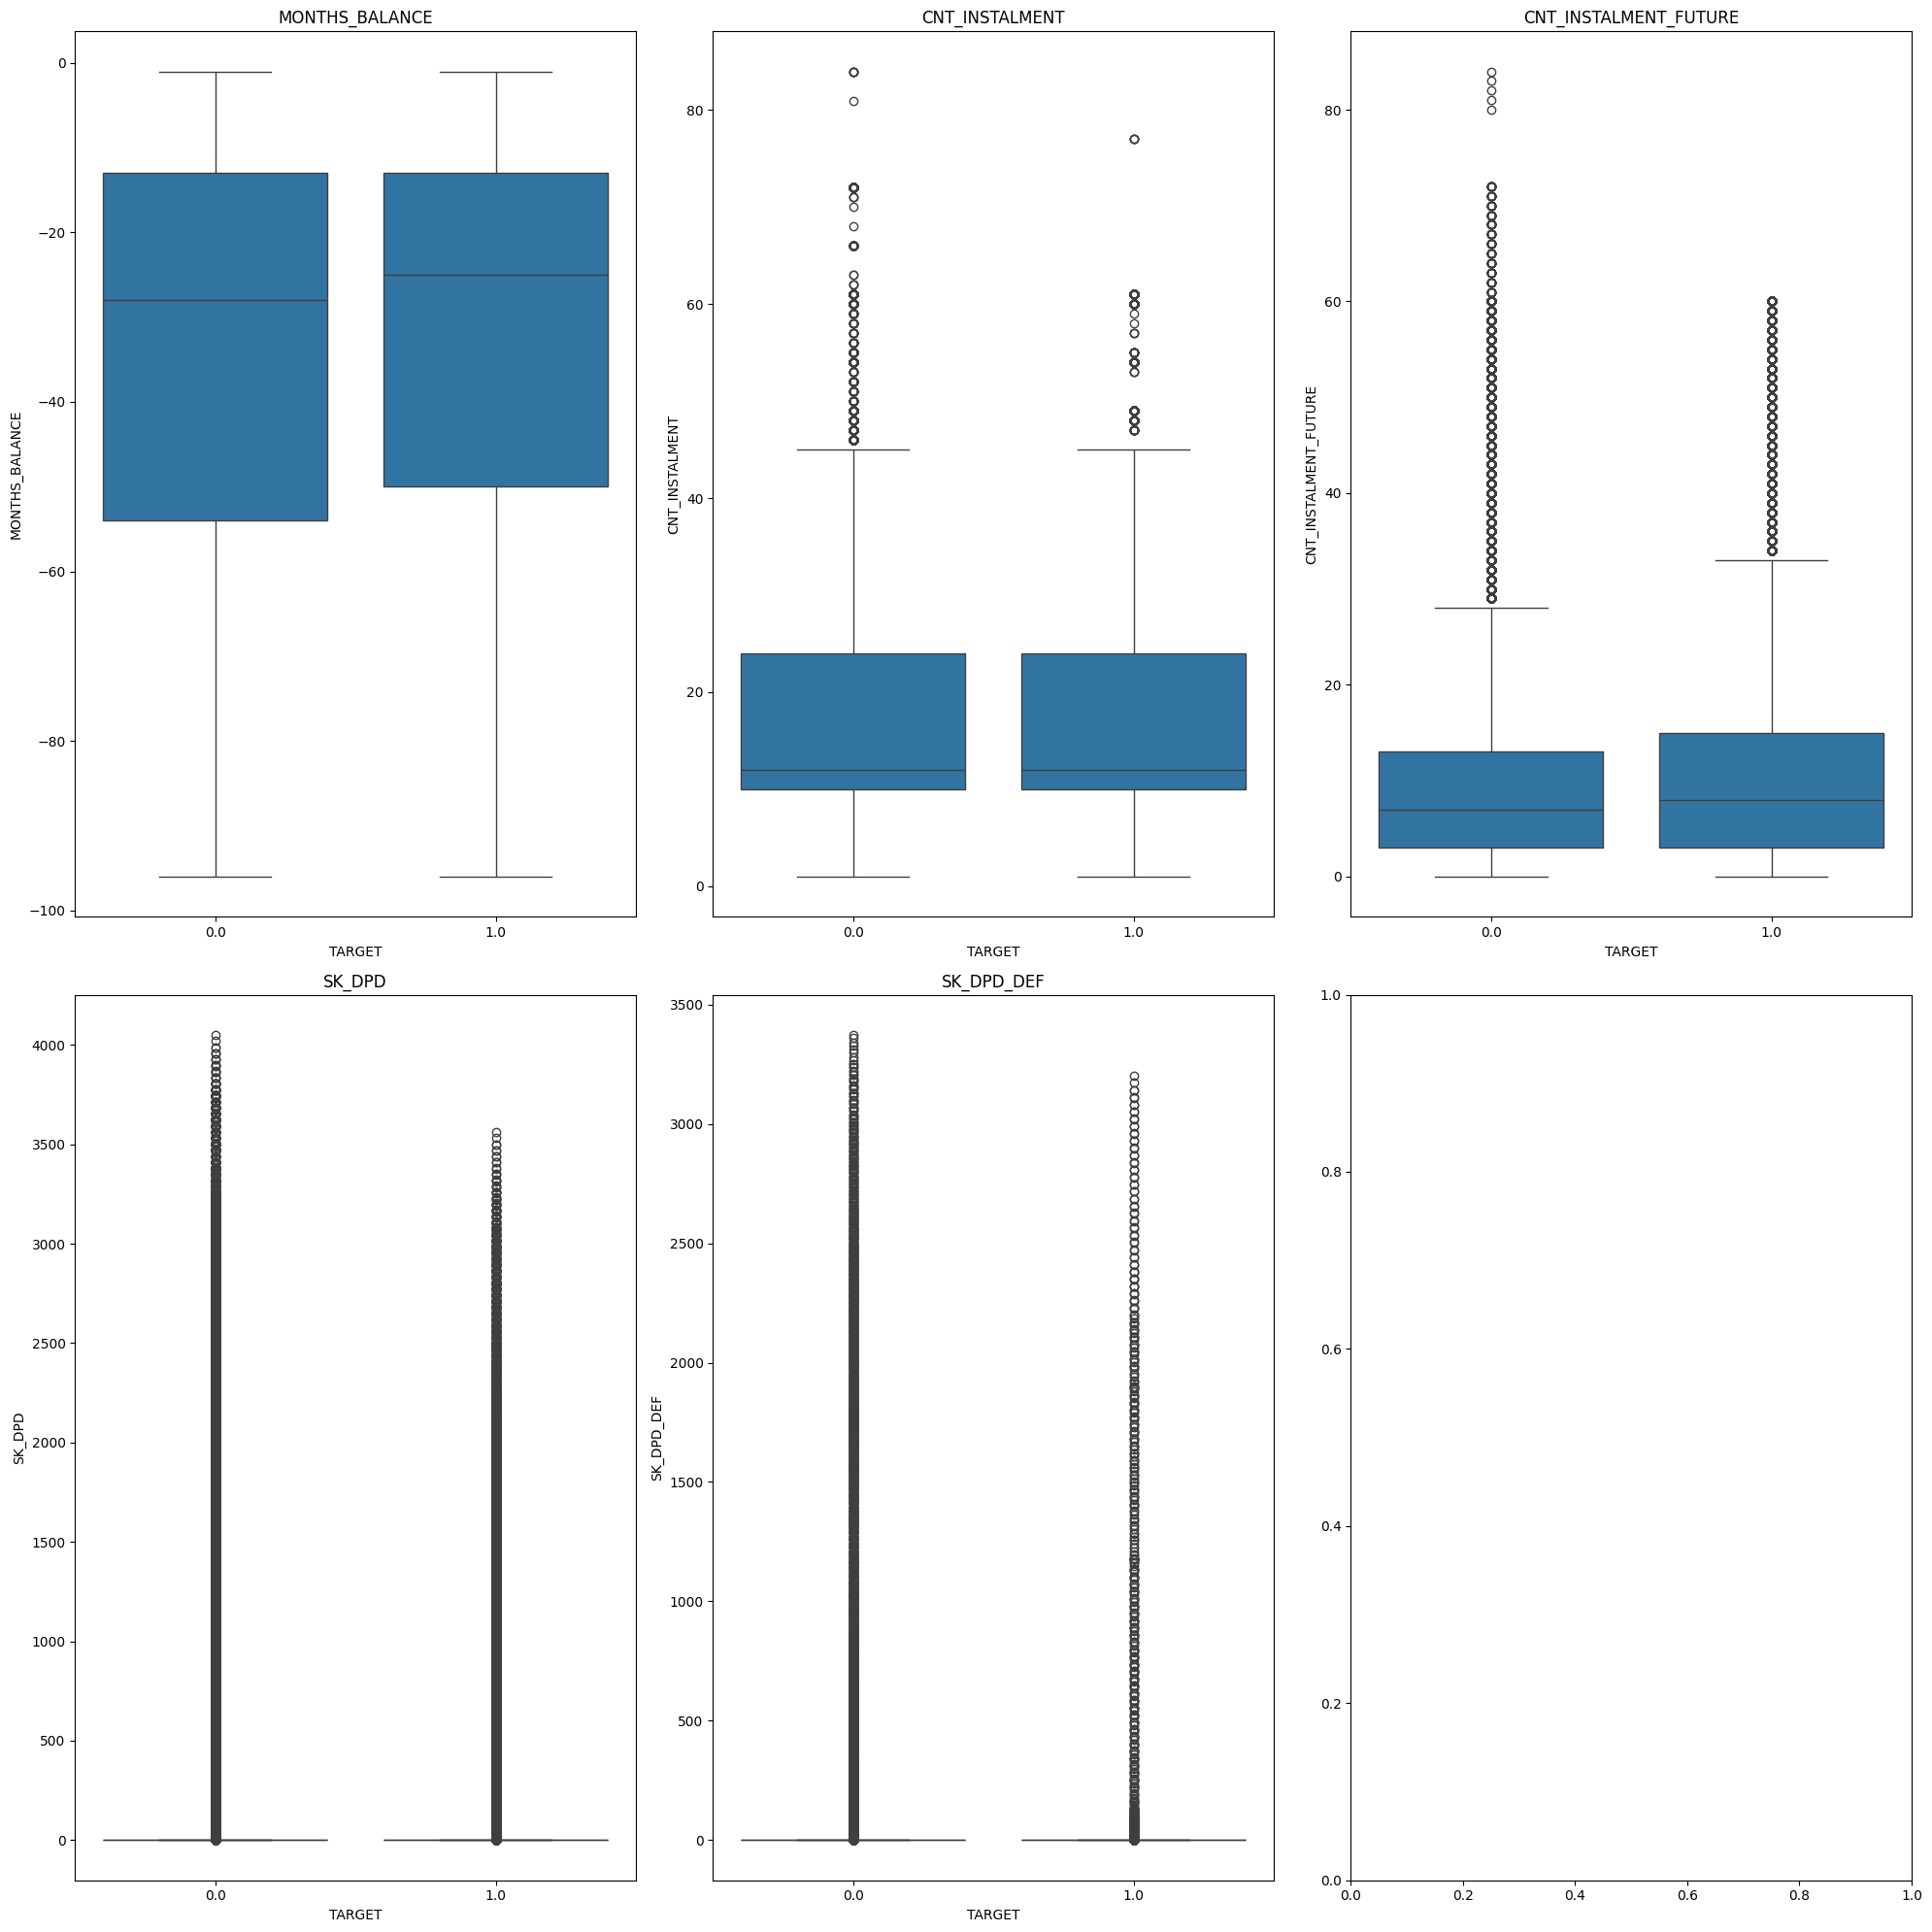

In [ ]:
# Boxplot for numerical columns with hue = TARGET
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 20))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='TARGET', y=col, data=df_merge, ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)

plt.tight_layout()
plt.show()

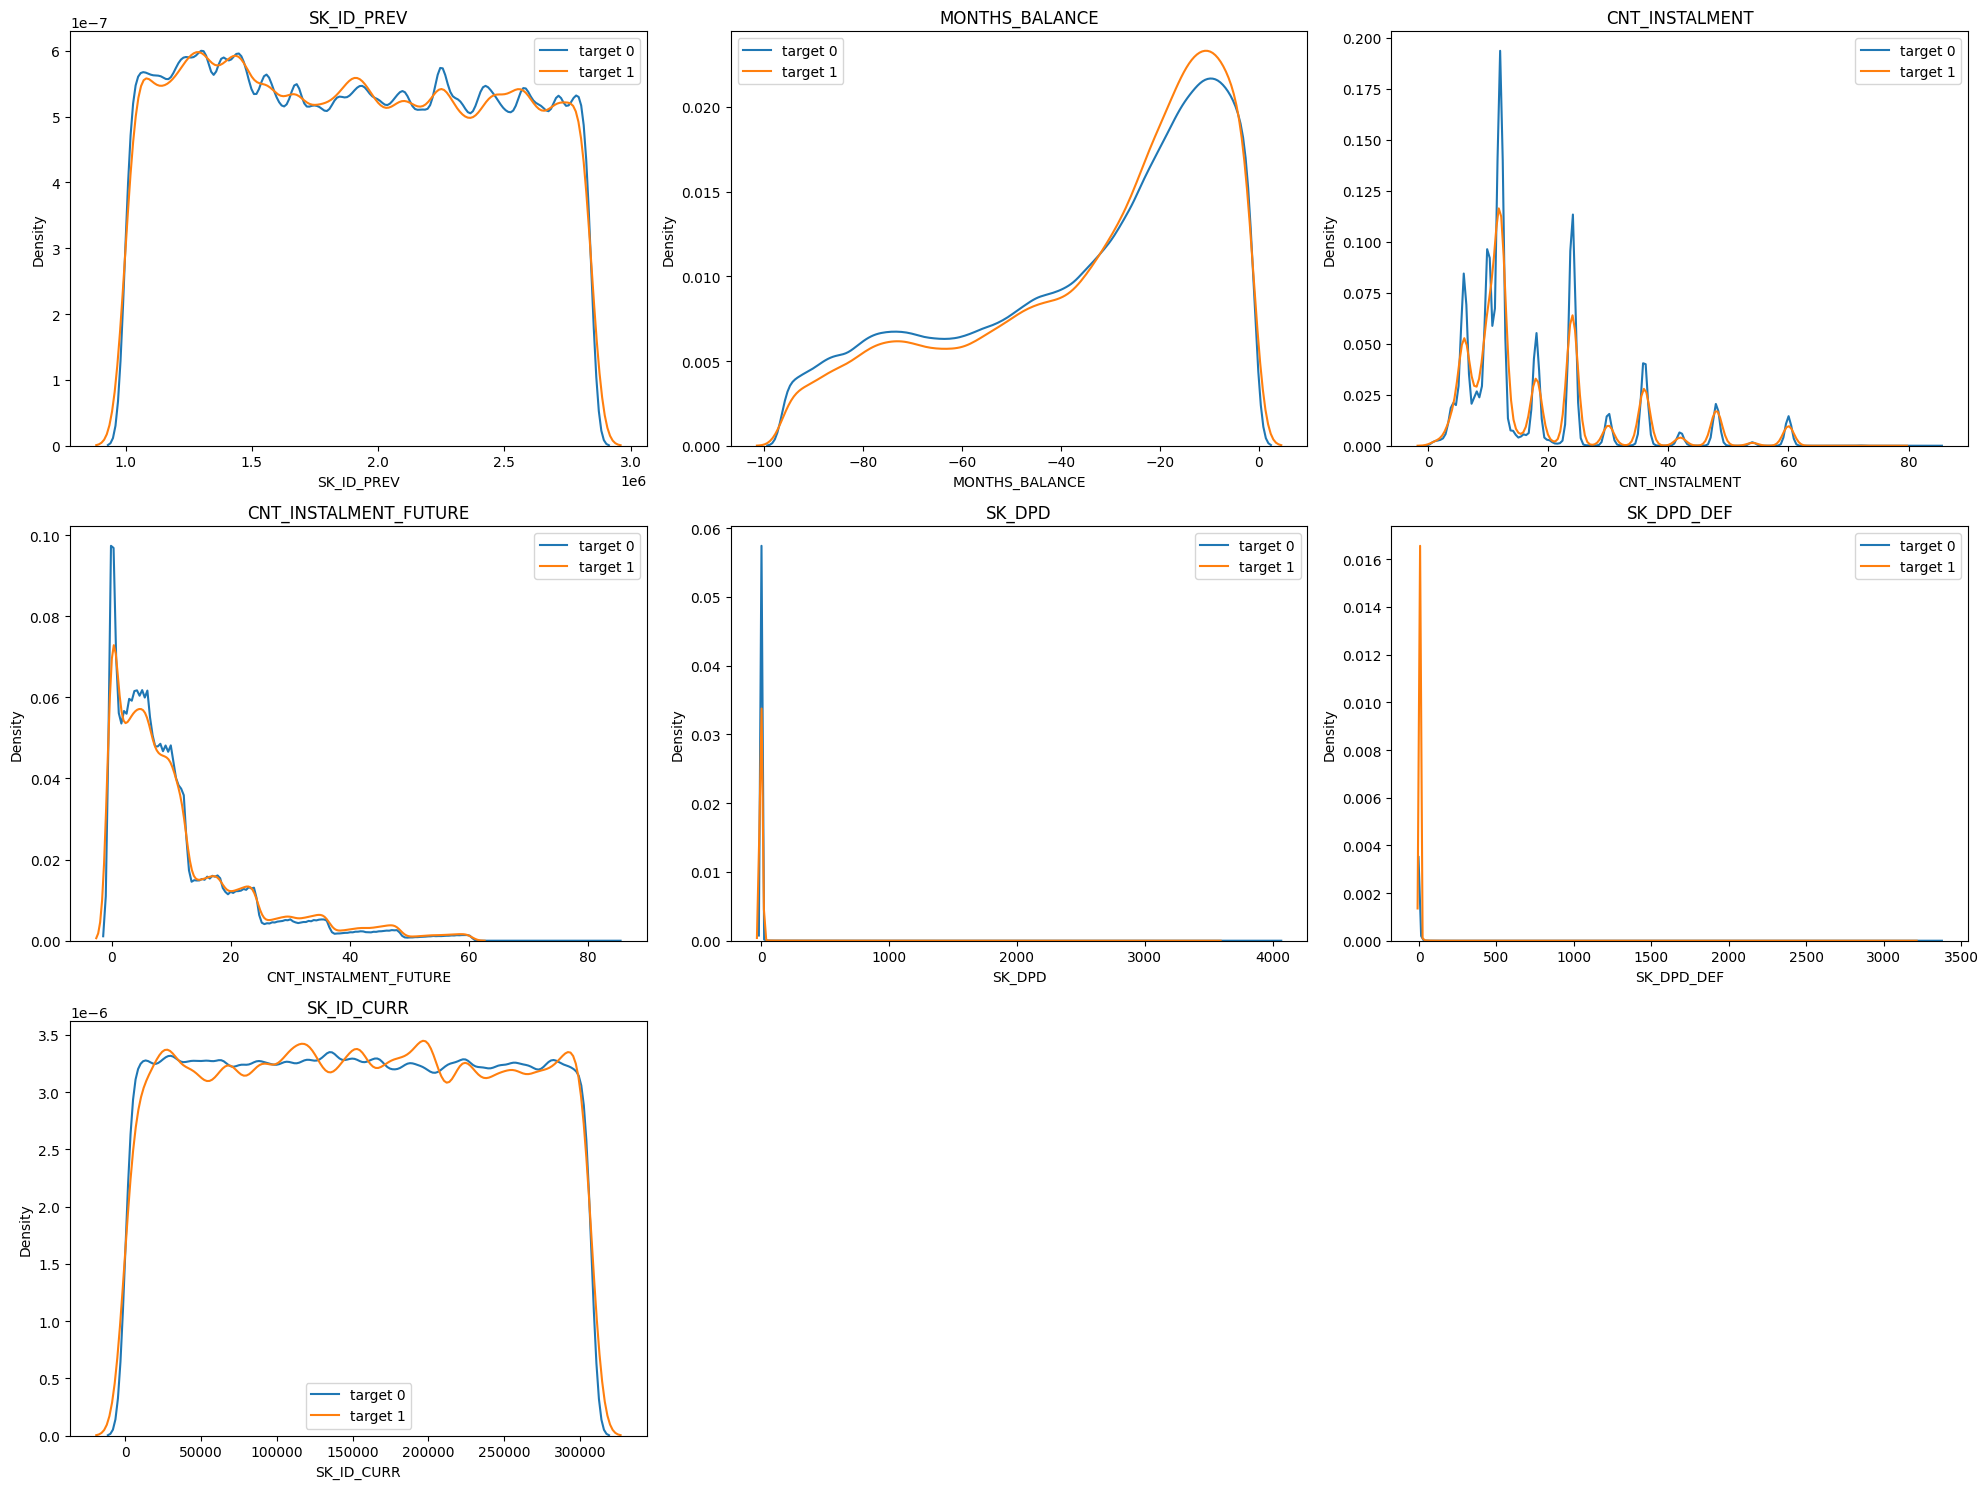

In [ ]:
# Get numerical columns with variance > 0.1
cols_to_plot = df_merge[num_cols].var()[df_merge[num_cols].var() > 0.1].index.tolist()

# Dynamically determine the number of rows and columns for subplots
ncol = 3
nrow = math.ceil(len(cols_to_plot) / ncol)
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 5 * nrow))  # Adjust height based on rows
ax = ax.flatten()  # Flatten the array to handle variable number of subplots

for i, col in enumerate(cols_to_plot):
    # KDE plot for each column
    sns.kdeplot(df_merge.loc[df_merge['TARGET'] == 0, col], label='target 0', ax=ax[i])
    sns.kdeplot(df_merge.loc[df_merge['TARGET'] == 1, col], label='target 1', ax=ax[i])
    ax[i].set_title(col)
    ax[i].legend()

# Remove unused subplots if any
for j in range(len(cols_to_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

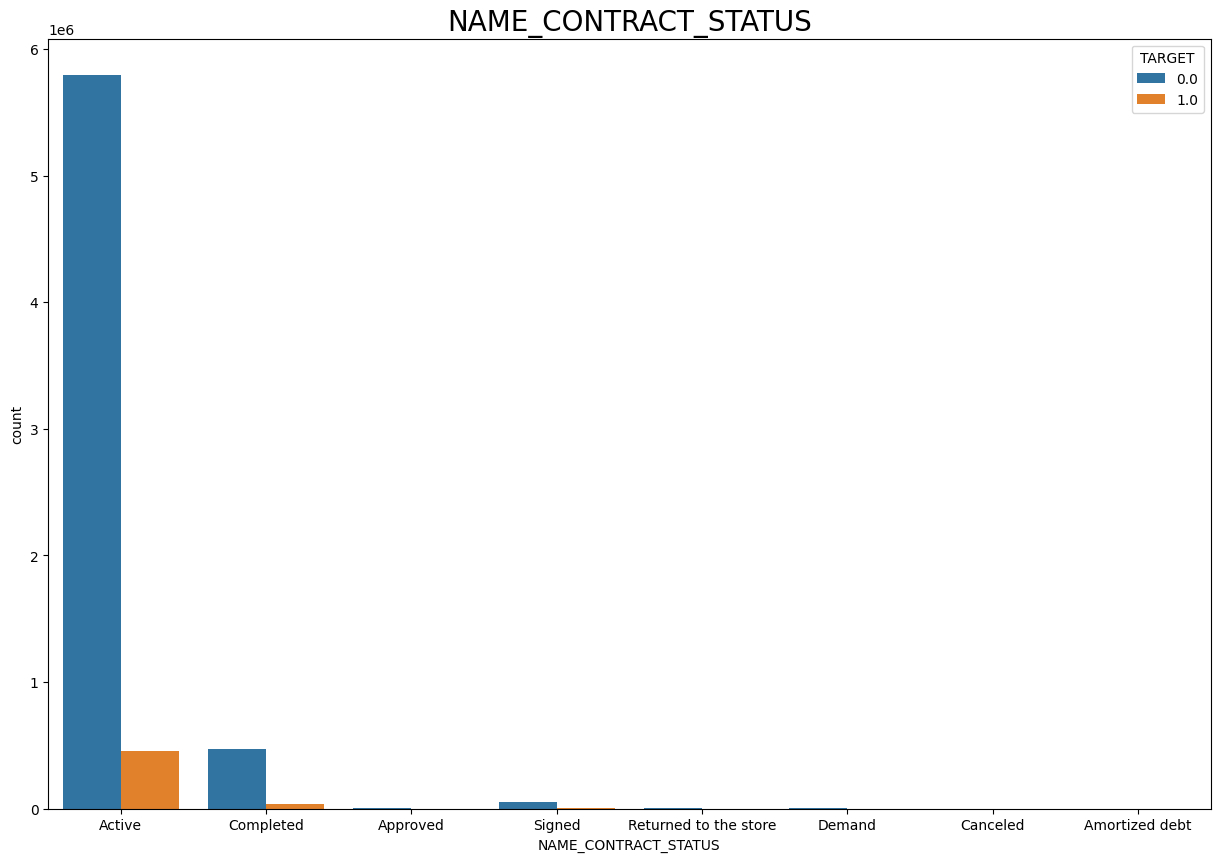

In [ ]:
# Plot the distribution of the categorical features with hue = target
plt.figure(figsize=(15,10))
sns.countplot(x = df_merge['NAME_CONTRACT_STATUS'], hue=df_merge['TARGET'])
plt.title('NAME_CONTRACT_STATUS', fontsize=20)
plt.show()

Main name of contract status in both customers with default and non-default target are Completed and Active.